In [11]:
#This repository uses publicly available data derived from the Swedish Adoption/Twin Study of Aging (SATSA), provided by 
#the Inter-university Consortium for Political and Social Research (ICPSR). 
#The data are licensed for secondary use and analysis. 
#Accessed via [ICPSR #4538](https://doi.org/10.3886/ICPSR03843.v2).
#
#Citation:
#Pedersen, Nancy L. Swedish Adoption/Twin Study on Aging (SATSA), 1984, 1987, 1990, 1993, 2004, 2007, and 2010. Inter-university Consortium for Political and Social Research [distributor], 2015-05-13.

In [13]:
#Example of Raw psychometric data from SATSA:
#
#Trait Proxy: A1: I want to be the best in everything
#Year: 1984
#1 exactly right 78 
#2 almost right 190 
#3 neither right nor wrong 318 
#4 not quite right 501 
#5 not right at all 836
#
#Normalization is not done initially so as to avoid unnecessary dimensional reduction
#ahead of the entropy conversion.

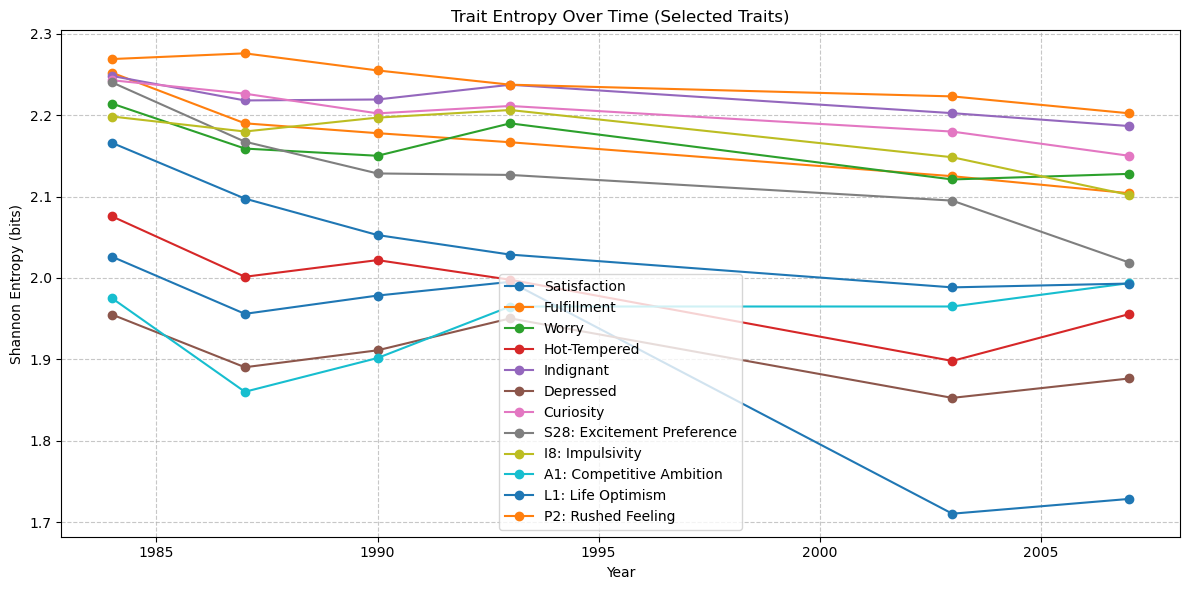

Trait                     Year    Entropy
Satisfaction              1984     2.0260
Satisfaction              1987     1.9559
Satisfaction              1990     1.9783
Satisfaction              1993     1.9952
Satisfaction              2003     1.7102
Satisfaction              2007     1.7284
Fulfillment               1984     2.2521
Fulfillment               1987     2.1900
Fulfillment               1990     2.1779
Fulfillment               1993     2.1668
Fulfillment               2003     2.1250
Fulfillment               2007     2.1041
Worry                     1984     2.2142
Worry                     1987     2.1590
Worry                     1990     2.1501
Worry                     1993     2.1900
Worry                     2003     2.1210
Worry                     2007     2.1279
Hot-Tempered              1984     2.0755
Hot-Tempered              1987     2.0014
Hot-Tempered              1990     2.0219
Hot-Tempered              1993     1.9978
Hot-Tempered              2003    

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Define Likert-scale trait frequency data (as in the main model)
# Each list contains 5 Likert bin counts per year, from 1 (low agreement) to 5 (high agreement)
# The years are: 1984, 1987, 1990, 1993, 2003, 2007:

trait_data = {
    "Satisfaction": [
        [76, 231, 294, 611, 698], #Row 1984: Likert scores 1 → 5
        [48, 146, 248, 523, 593], #Row 1987: Same structure throughout
        [40, 125, 288, 480, 489], #Row 1990
        [29, 158, 289, 447, 480], #Row 1993
        [92, 443, 156, 68, 15],   #Row 2003
        [85, 354, 138, 40, 17]    #Row 2007
    ],
    "Fulfillment": [
        [193, 348, 445, 539, 382],
        [114, 252, 448, 447, 291],
        [106, 230, 423, 424, 240],
        [92, 212, 461, 344, 290],
        [40, 110, 239, 235, 149],
        [25, 95, 197, 189, 126]
    ],
    "Worry": [
        [159, 374, 325, 548, 527],
        [95, 241, 300, 476, 448],
        [74, 229, 309, 455, 359],
        [85, 250, 316, 391, 364],
        [29, 133, 175, 250, 185],
        [22, 113, 171, 179, 144]
    ],
    "Hot-Tempered": [
        [124, 249, 287, 473, 780],
        [73, 162, 280, 360, 683],
        [60, 156, 254, 376, 576],
        [43, 179, 243, 350, 586],
        [12, 75, 137, 214, 335],
        [17, 59, 119, 178, 259]
    ],
    "Indignant": [
        [185, 457, 334, 524, 415],
        [114, 332, 312, 448, 345],
        [101, 337, 329, 381, 280],
        [112, 353, 305, 344, 289],
        [53, 163, 204, 217, 139],
        [38, 139, 166, 176, 109]
    ],
    "Depressed": [
        [103, 159, 269, 527, 855],
        [54, 105, 251, 450, 700],
        [38, 98, 263, 464, 563],
        [40, 114, 265, 453, 535],
        [13, 52, 135, 253, 323],
        [9, 43, 127, 200, 246]
    ],
    "Curiosity": [
        [229, 520, 295, 310, 218],
        [116, 371, 402, 346, 287],
        [97, 343, 401, 319, 237],
        [99, 327, 385, 334, 245],
        [44, 196, 207, 189, 125],
        [31, 164, 193, 136, 103]
    ],
    "S28: Excitement Preference": [
        [168, 408, 514, 468, 348],
        [107, 365, 502, 360, 211],
        [94, 343, 505, 309, 168],
        [91, 341, 505, 285, 174],
        [38, 180, 287, 166, 101],
        [28, 140, 266, 128, 67]
    ],
    "I8: Impulsivity": [
        [189, 332, 263, 584, 556],
        [108, 241, 313, 457, 450],
        [110, 228, 294, 452, 343],
        [113, 236, 284, 437, 351],
        [46, 117, 181, 266, 165],
        [27, 84, 154, 214, 154]
    ],
    "A1: Competitive Ambition": [
        [78, 190, 318, 501, 836],
        [38, 98, 279, 455, 700],
        [34, 97, 292, 402, 600],
        [36, 131, 302, 368, 570],
        [16, 72, 184, 207, 297],
        [11, 67, 171, 170, 213]
    ],
    "L1: Life Optimism": [
        [278, 656, 515, 322, 156],
        [154, 444, 589, 238, 137],
        [117, 393, 569, 231, 112],
        [97, 363, 578, 264, 104],
        [36, 219, 316, 138, 63],
        [31, 156, 270, 121, 53]
    ],
    "P2: Rushed Feeling": [
        [337, 573, 274, 429, 312],
        [207, 435, 293, 368, 269],
        [149, 369, 310, 365, 237],
        [133, 411, 299, 327, 238],
        [54, 183, 185, 190, 162],
        [44, 146, 135, 191, 116]
    ],
}

years = [1984, 1987, 1990, 1993, 2003, 2007]

# Entropy extraction function:
def compute_entropy_per_year(freqs):
    entropies = []
    for year_data in freqs:
        dist = np.array(year_data, dtype=np.float64)
        dist /= dist.sum()  # Normalize
        entropies.append(entropy(dist, base=2))  # Shannon entropy, base 2
    return entropies

# Optional: visualize a few traits or all traits
if __name__ == "__main__":
    plt.figure(figsize=(12, 6))

    for trait in trait_data: #this will plot all traits
        e_vals = compute_entropy_per_year(trait_data[trait])
        plt.plot(years, e_vals, marker='o', label=trait)



    
    plt.title("Trait Entropy Over Time (Selected Traits)")
    plt.xlabel("Year")
    plt.ylabel("Shannon Entropy (bits)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Compute entropy per year per trait
print(f"{'Trait':<25} {'Year':<6} {'Entropy':>8}")
print("=" * 42)

for trait, data in trait_data.items():
    for i, year_data in enumerate(data):
        probs = np.array(year_data) / np.sum(year_data)
        ent = entropy(probs, base=2)  # use base 2 for bits
        print(f"{trait:<25} {years[i]:<6} {ent:>8.4f}")